<a href="https://colab.research.google.com/github/Santosw-Git/Classification_on_FashionMnist_dataset/blob/main/Image_Classification_using_logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
dataset=MNIST(root='data/',download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 58.4MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.01MB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.1MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.68MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
test_dataset=MNIST(root='data/',train=False)

In [ ]:
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


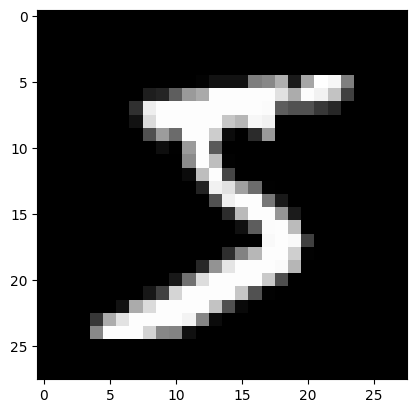

In [ ]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print("Label:",label)

In [ ]:
import torchvision.transforms as transforms

In [ ]:
#MNIST dataset (images and labels)
dataset=MNIST(root='data/',
              train=True,
              transform=transforms.ToTensor())

In [ ]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.min(img_tensor),torch.max(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(0.) tensor(1.)


Label: 5


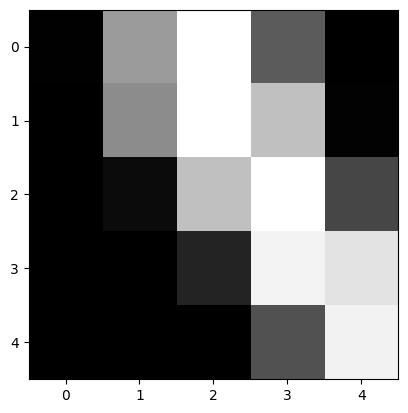

In [ ]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')
print("Label:",label)

In [ ]:
import numpy as np

def split_indices(n,val_pct):
  # determine size of validation set
  n_val=int(val_pct*n)

  idxs=np.random.permutation(n)

  return idxs[n_val:],idxs[:n_val]


In [ ]:
train_indxs,val_idxs=split_indices(len(dataset),0.2)

In [ ]:
print(len(train_indxs),len(val_idxs))

48000 12000


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
batch_size=100

train_sampler=SubsetRandomSampler(train_indxs)
train_loader=DataLoader(dataset,
                        batch_size,
                        sampler=train_sampler)
val_sampler=SubsetRandomSampler(val_idxs)
val_loader=DataLoader(dataset,
                      batch_size,
                      sampler=val_sampler)

In [ ]:
import torch.nn as nn

input_size=28*28
num_classes=10

model = nn.Linear(input_size,num_classes)

In [ ]:
print(model.weight.shape)

torch.Size([10, 784])


In [ ]:
print(model.bias.shape)

torch.Size([10])


In [ ]:
for images,labels in train_loader:
  print(labels)
  print(images.shape)
  # output=model(images)
  break

tensor([9, 3, 1, 9, 1, 6, 9, 6, 5, 5, 5, 2, 8, 7, 5, 6, 2, 4, 7, 2, 1, 4, 9, 2,
        8, 4, 1, 7, 1, 6, 0, 0, 2, 1, 2, 7, 0, 1, 7, 4, 7, 9, 8, 0, 7, 9, 1, 1,
        7, 6, 3, 7, 6, 7, 6, 9, 3, 1, 1, 4, 8, 1, 9, 5, 8, 5, 8, 2, 4, 4, 0, 0,
        2, 2, 5, 9, 1, 0, 9, 2, 5, 2, 4, 8, 4, 6, 4, 2, 8, 3, 9, 6, 7, 5, 8, 5,
        9, 4, 5, 1])
torch.Size([100, 1, 28, 28])


In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out

In [ ]:
model=MnistModel()

In [ ]:
print(model.linear.weight.shape,model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0220, -0.0310,  0.0321,  ...,  0.0197, -0.0314,  0.0354],
         [ 0.0201, -0.0114,  0.0244,  ..., -0.0014,  0.0319, -0.0244],
         [ 0.0127,  0.0197, -0.0042,  ...,  0.0206, -0.0160, -0.0142],
         ...,
         [-0.0126, -0.0039, -0.0026,  ...,  0.0280,  0.0022,  0.0134],
         [-0.0216, -0.0078,  0.0026,  ..., -0.0014, -0.0158, -0.0250],
         [ 0.0237,  0.0050, -0.0010,  ..., -0.0318,  0.0254, -0.0304]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0141,  0.0245,  0.0002,  0.0160, -0.0271, -0.0199,  0.0165,  0.0056,
         -0.0168,  0.0163], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
  outputs=model(images)
  break

print("outputs.shape:",outputs.shape)
print("Sample outputs\n", outputs[:2])


outputs.shape: torch.Size([100, 10])
Sample outputs
 tensor([[ 0.2797,  0.0788,  0.0488, -0.1032,  0.2269, -0.0529, -0.2094,  0.0081,
          0.1981, -0.0687],
        [ 0.0861, -0.0269,  0.2017, -0.1473,  0.1354, -0.0715, -0.0340,  0.1071,
          0.1914,  0.0362]], grad_fn=<SliceBackward0>)


In [ ]:
import torch.nn.functional as F

In [ ]:
# APPLY softmax for each output row
probs=F.softmax(outputs,dim=1)

# Look at sample probabilities
print("Sample probabilities\n", probs[:2])

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities
 tensor([[0.1256, 0.1027, 0.0997, 0.0856, 0.1191, 0.0901, 0.0770, 0.0957, 0.1158,
         0.0886],
        [0.1033, 0.0922, 0.1159, 0.0818, 0.1085, 0.0882, 0.0916, 0.1055, 0.1148,
         0.0982]], grad_fn=<SliceBackward0>)
Sum:  1.0


In [ ]:
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([0, 2, 2, 2, 4, 2, 4, 7, 0, 2, 8, 8, 2, 2, 8, 3, 4, 0, 2, 2, 0, 1, 1, 2,
        3, 2, 2, 2, 2, 4, 9, 8, 4, 3, 8, 0, 2, 8, 2, 4, 2, 8, 2, 2, 0, 2, 0, 9,
        1, 9, 2, 8, 4, 2, 8, 0, 0, 2, 2, 2, 2, 8, 4, 2, 2, 1, 4, 2, 1, 4, 2, 0,
        2, 2, 2, 9, 8, 2, 4, 2, 2, 4, 2, 4, 4, 2, 3, 4, 2, 4, 8, 2, 2, 2, 2, 0,
        0, 0, 2, 2])
tensor([0.1256, 0.1159, 0.1219, 0.1324, 0.1486, 0.1264, 0.1226, 0.1362, 0.1205,
        0.1243, 0.1251, 0.1348, 0.1164, 0.1280, 0.1284, 0.1212, 0.1461, 0.1299,
        0.1303, 0.1311, 0.1258, 0.1320, 0.1302, 0.1393, 0.1197, 0.1511, 0.1474,
        0.1186, 0.1513, 0.1281, 0.1247, 0.1137, 0.1198, 0.1296, 0.1203, 0.1324,
        0.1378, 0.1272, 0.1415, 0.1337, 0.1369, 0.1202, 0.1365, 0.1305, 0.1342,
        0.1439, 0.1125, 0.1328, 0.1198, 0.1166, 0.1369, 0.1206, 0.1456, 0.1403,
        0.1244, 0.1329, 0.1400, 0.1259, 0.1319, 0.1685, 0.1330, 0.1196, 0.1244,
        0.1409, 0.1464, 0.1187, 0.1379, 0.1191, 0.1412, 0.1204, 0.1345, 0.1277,
        0.1343, 0.1

In [ ]:
labels

tensor([5, 9, 6, 1, 0, 7, 6, 8, 6, 8, 6, 5, 9, 9, 2, 5, 0, 9, 7, 8, 3, 3, 0, 9,
        8, 8, 4, 7, 9, 0, 3, 3, 2, 9, 9, 4, 3, 6, 9, 5, 4, 2, 8, 9, 4, 9, 5, 8,
        5, 0, 1, 0, 3, 8, 6, 5, 4, 2, 2, 4, 8, 0, 8, 3, 8, 5, 5, 3, 6, 9, 4, 7,
        4, 4, 9, 1, 3, 3, 3, 8, 5, 1, 0, 0, 0, 9, 3, 3, 8, 6, 6, 1, 9, 9, 8, 8,
        2, 5, 7, 4])

In [ ]:
def accuracy(labels,preds):
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [ ]:
accu=accuracy(labels,preds)
accu

tensor(0.0300)

In [ ]:
loss_fn=F.cross_entropy

In [ ]:
loss_fn(outputs,labels)


tensor(2.3548, grad_fn=<NllLossBackward0>)

# Optimizer

In [ ]:
learning_rate=0.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
def loss_batch(model,loss_fn,xb,yb,opt=None,metrics=None):

  # generate predictions
  preds=model(xb)
  loss=loss_fn(preds,yb)

  if opt is not None:
    # calculate gradients
    loss.backward()
    # update parameters
    opt.step()
    # reset gradients
    opt.zero_grad()

  metric_result=None
  if metrics is not None:
    metric_result=metrics(preds,yb)

  return loss.item(),len(xb),metric_result

In [ ]:
def evaluate(model,loss_fn,valid_dl,metric=None):
  with torch.no_grad():
    results=[loss_batch(model,loss_fn,xb,yb,metrics=metric) for xb,yb in valid_dl]
    losses,nums,metrics=zip(*results)
    total=np.sum(nums)

    avg_loss=np.sum(np.multiply(losses,nums))/total

    avg_metric=None
    if metric is not None:
      avg_metric=np.sum(np.multiply(metrics,nums))/total

  return avg_loss,total,avg_metric

In [ ]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [ ]:
val_loss,total,val_metric=evaluate(model,loss_fn,val_loader,metric=accuracy)

In [ ]:
print("val_loss:",val_loss)
print("total:",total)
print("val_metric:",val_metric)

val_loss: 2.352628030379613
total: 12000
val_metric: 0.06799999990810951


In [ ]:
from math import e
def fit(epochs,model,loss_fn,train_dl,valid_dl,opt,metric=None):
  for epoch in range(epochs):
    for xb,yb in train_dl:
      train_loss,_,_=loss_batch(model,loss_fn,xb,yb,opt,metric)
    # Evaluation
    result=evaluate(model,loss_fn,valid_dl,metric)
    val_loss,total,val_metric=result

    # print progress:
    if metric is None:
      print("Epoch [{}/{}],train_loss:{:.4f}\tval_loss:{:.4f}".format(
          epoch+1,epochs,train_loss,val_loss))
    else:
      print("Epoch [{}/{}],train_loss:{:.4f}\tval_loss:{:.4f}\tval_{}:{}".format(
          epoch+1,epochs,train_loss,val_loss,metric.__name__,val_metric))

In [ ]:
model=MnistModel()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [ ]:
fit(5,model,loss_fn,train_loader,val_loader,optimizer,accuracy)

Epoch [1/5],train_loss:1.8938	val_loss:1.8703	val_accuracy:0.6599999984105428
Epoch [2/5],train_loss:1.5956	val_loss:1.5726	val_accuracy:0.7484166661898295
Epoch [3/5],train_loss:1.3878	val_loss:1.3633	val_accuracy:0.7764999990661939
Epoch [4/5],train_loss:1.2177	val_loss:1.2127	val_accuracy:0.7973333343863487
Epoch [5/5],train_loss:1.1510	val_loss:1.1010	val_accuracy:0.8075833295782407


In [ ]:
fit(10,model,loss_fn,train_loader,val_loader,optimizer,accuracy)

Epoch [1/10],train_loss:1.0140	val_loss:1.0152	val_accuracy:0.8167499984304111
Epoch [2/10],train_loss:0.8898	val_loss:0.9476	val_accuracy:0.8239999999602635
Epoch [3/10],train_loss:0.7948	val_loss:0.8931	val_accuracy:0.8300833314657211
Epoch [4/10],train_loss:0.8152	val_loss:0.8480	val_accuracy:0.8340833321213722
Epoch [5/10],train_loss:0.9024	val_loss:0.8102	val_accuracy:0.8381666650374731
Epoch [6/10],train_loss:0.7326	val_loss:0.7779	val_accuracy:0.8415833334128062
Epoch [7/10],train_loss:0.7637	val_loss:0.7501	val_accuracy:0.844999997317791
Epoch [8/10],train_loss:0.6822	val_loss:0.7257	val_accuracy:0.8475833331545194
Epoch [9/10],train_loss:0.7933	val_loss:0.7043	val_accuracy:0.8493333324790001
Epoch [10/10],train_loss:0.7534	val_loss:0.6852	val_accuracy:0.8517499978343646
